In [31]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import os

In [39]:
path = r'/Users/jenifervivar/Desktop/crop_part1/'

listing = os.listdir(path) 
images = []
for img in listing:
    image = plt.imread(path + img)
    images.append(image)
images = np.array(images)

In [48]:
images[0].shape

(200, 200, 3)

### image exploration

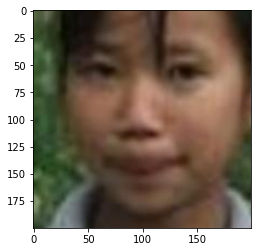

In [50]:
plt.imshow(images[0])

In [45]:
images[0].shape

(200, 200, 3)

In [37]:
images.shape

(9780, 200, 200, 3)

In [47]:
r = images[0][:,:,0]
g = images[0][:,:,1]
b = images[0][:,:,2]
print(r, g, b)

[[ 93  90  87 ...  20  19  20]
 [ 92  90  86 ...  20  21  20]
 [ 91  89  86 ...  20  20  20]
 ...
 [ 46  47  48 ... 166 168 170]
 [ 40  41  42 ... 165 166 167]
 [ 36  37  38 ... 166 167 167]] [[107 104 101 ...  30  29  27]
 [107 104 100 ...  30  28  27]
 [106 104 100 ...  30  27  27]
 ...
 [ 64  65  66 ... 169 171 173]
 [ 58  59  60 ... 168 169 170]
 [ 54  55  56 ... 166 167 167]] [[ 74  71  68 ...  22  21  20]
 [ 74  71  67 ...  22  21  20]
 [ 73  71  67 ...  22  20  20]
 ...
 [ 38  41  42 ... 176 178 180]
 [ 34  35  36 ... 175 176 177]
 [ 30  31  32 ... 174 175 175]]


In [36]:
img = image[0].reshape(200, 3)
img[:,:0]

array([], shape=(200, 0), dtype=uint8)

In [53]:
from skimage.feature import canny
from skimage import color

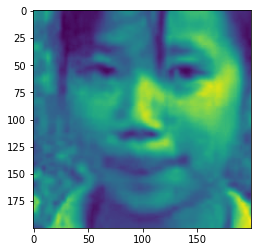

In [55]:
gray_img = color.rgb2gray(images[0])
plt.imshow(gray_img)

In [67]:
gray_img.shape

(200, 200)

#### below i'm applying the sobel filters on my images one on each pixel value and the other on hsv

In [70]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

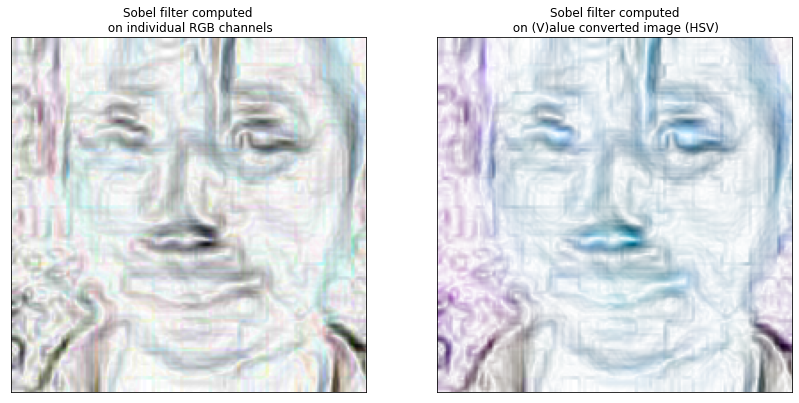

In [77]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

#image = data.astronaut()

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(images[0])))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(images[0])))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")

#### below I'm trying to showthe roberts filter vs the sobel filter. both are simlar

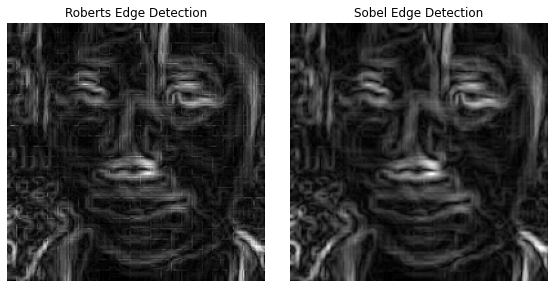

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images


#image = camera()
edge_roberts = filters.roberts(gray_img)
edge_sobel = filters.sobel(gray_img)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


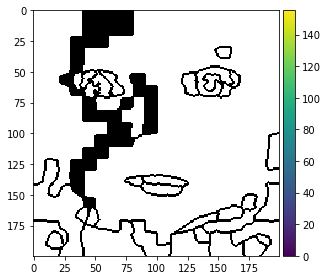

In [80]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])


#img = data.coffee()
labels = segmentation.slic(images[220], compactness=30, n_segments=400, start_label=1)
g = graph.rag_mean_color(images[220], labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, images[0], kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

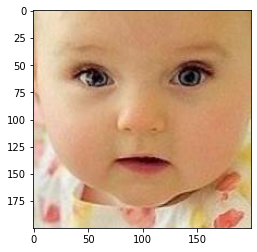

In [81]:
plt.imshow(images[220])

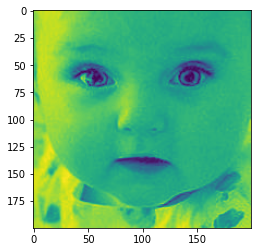

In [82]:
gray_img = color.rgb2gray(images[220])
plt.imshow(gray_img)

In [84]:
from skimage.filters import gaussian
gauss_img = gaussian(images[220], multichannel = True)

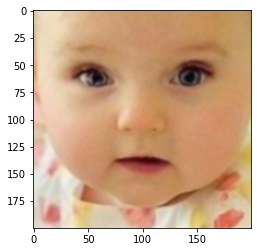

In [85]:
plt.imshow(gauss_img)

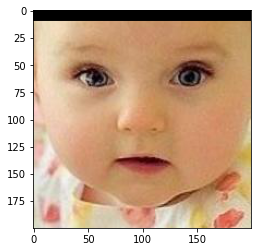

In [86]:
baby = np.array(images[220])
baby[:10] = 0
plt.imshow(baby)

In [94]:
from skimage import exposure
image_eq = exposure.equalize_hist(baby)

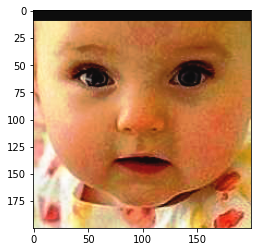

In [95]:
plt.imshow(image_eq)

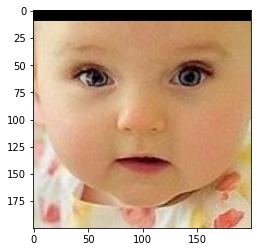

In [100]:
image_eq1 = exposure.equalize_adapthist(baby, clip_limit = 0.003)
plt.imshow(image_eq1)

In [105]:
from skimage import morphology
square = morphology.square(4)
rectangle = morphology.rectangle(4,2)
rectangle

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [106]:
baby.shape

(200, 200, 3)